# CoreMS Tutorial
`CoreMS` framework for mass spectrum

### 1. Import Bruker Transient File

m/z count 10660
first m/z 999.6601694407478 final m/z 155.87356999974597


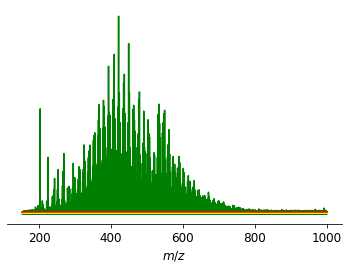

In [26]:
from pathlib import Path

from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.transient.input.brukerSolarix import ReadBrukerSolarix

file_location =  Path("data") / "ESI_NEG_SRFA.d"

MSParameters.transient.apodization_method = "Hanning"
MSParameters.transient.number_of_truncations = 0
MSParameters.transient.number_of_zero_fills = 1

MSParameters.mass_spectrum.threshold_method = 'relative_abundance'
MSParameters.mass_spectrum.relative_abundance_threshold = 1

#MSParameters.mass_spectrum.threshold_method = 'signal_noise'
#MSParameters.mass_spectrum.s2n_threshold = 50

#MSParameters.mass_spectrum.threshold_method = 'auto'
#MSParameters.mass_spectrum.noise_threshold_std = 32

MSParameters.ms_peak.peak_min_prominence_percent = 1
        
def import_transient():
    
    with ReadBrukerSolarix(file_location) as bruker_transient:

        mass_spectrum = bruker_transient.get_mass_spectrum(plot_result=False, auto_process=True)

        mass_spectrum.plot_profile_and_noise_threshold()

        print("m/z count", len(mass_spectrum_obj))

        print('first m/z', mass_spectrum.mspeaks[0].mz_exp, 'final m/z', mass_spectrum_obj.mspeaks[-1].mz_exp)
    
    return mass_spectrum

mass_spectrum = import_transient()

In [ ]:
#reader_obj = ReadMassList(file_location, isCentroid=True)
#reader_obj = ReadMassList(file_location)
#reader_obj = ReadMassList(file_location)
#reader_obj = ReadHDF_BoosterMassSpectrum(file_location, polarity)

### 2. Import Centroid Mass List Files


Loading mass spectrum object
1696036.9907192576 273703.19015854585
21507


/usr/local/lib/python3.7/site-packages/CoreMS-19.0.0b0-py3.7.egg/corems/mass_spectrum/input/baseClass.py:186: UserWarning: auto settings loading is enabled but could not locate the file:  data/ESI_NEG_ESFA.json. Please load the settings manually


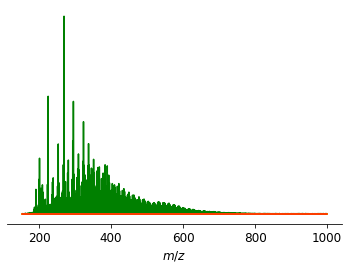

number_average_molecular_weight 404.6021468555896
weight_average_molecular_weight 442.0792555365756


In [24]:
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

def import_centroid():
    file_location = Path("data") / "ESI_NEG_ESFA.ascii"

    #load any type of mass list file i.e : "," for csv, "\t" for tabulated mass list, etc
    # Needs for columns: m/z, peak heightk, s/n and resolving power
    mass_list_reader = ReadMassList(file_location)

    #polarity need to be set or read from the file
    polarity = -1

    # Change Threshold Parameters:
    # MSParameters.mass_spectrum.threshold_method = 'relative_abundance'
    # MSParameters.mass_spectrum.relative_abundance_threshold = 30

    # MSParameters.mass_spectrum.threshold_method = 'signal_noise'
    # MSParameters.mass_spectrum.s2n_threshold = 100

    MSParameters.mass_spectrum.threshold_method = 'auto'
    MSParameters.mass_spectrum.noise_threshold_std = 6

    mass_spectrum = mass_list_reader.get_mass_spectrum(polarity, auto_process=True)

    print(mass_spectrum.baselise_noise, mass_spectrum.baselise_noise_std)
    print(len(mass_spectrum))
    # mass_spectrum.plot_mz_domain_profile()
    mass_spectrum.plot_profile_and_noise_threshold()

    pyplot.show()

    print(
        "number_average_molecular_weight",
        mass_spectrum.number_average_molecular_weight(),
    )
    print(
        "weight_average_molecular_weight",
        mass_spectrum.weight_average_molecular_weight(),
    )
    return mass_spectrum 

mass_spectrum = import_centroid()

### Import Profile Mass List Files

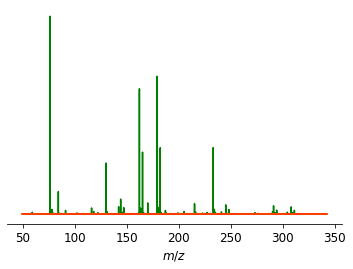

In [14]:
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

file_location = Path("data") / "Thermo_Profile_MassList.txt"
    
MSParameters.mass_spectrum.threshold_method = 'auto'
MSParameters.mass_spectrum.noise_threshold_std = 3

# isThermoProfile sets a exception to allow the parser of files with only two columns, i.e. m/z and abundance
# however features that depends on s/n and or resolving power will throw a error 
def import_profile()
    mass_list_reader = ReadMassList(file_location, header_lines=7, isCentroid=False, isThermoProfile=True)

    polarity = +1

    mass_spectrum = mass_list_reader.get_mass_spectrum(polarity, auto_process=True, loadSettings=False)

    mass_spectrum.plot_profile_and_noise_threshold()

    pyplot.show()
    
    return mass_spectrum

mass_spectrum = import_profile()

### 3. Access mass spectrum peak objects

In [16]:
kb = {'C': 1, 'H': 2}

print("m/z", "peak height", "resolving power", "S/N", "Kendrick Mass Defect", "Has Molecular Formula Obj")

for mspeak in mass_spectrum.sort_by_abundance():
    
    print(mspeak.mz_exp, mspeak.abundance, mspeak.resolving_power, 
          mspeak.signal_to_noise, mspeak.kmd, mspeak.is_assigned)
    
    mspeak.change_kendrick_base(kb)



m/z peak height resolving power S/N Kendrick Mass Defect Has Molecular Formula Obj
183.05557112662123 81106.160128 246373.5894926149 661.9857646237955 -0.8511687993649559 False
235.05480728964818 97430.304542 217341.48964959642 795.2228850185559 -0.7923419118010031 False
304.2846425943308 102737.09654700001 191013.6264892256 838.5367437635044 -0.944874245780511 False
146.02701992096132 103064.212638 275782.925401863 841.2066543508091 -0.863964174936001 False
240.91829489325778 115954.43181800001 214722.2834152231 946.4161919071896 -0.6492822658260025 False
216.03246421123035 118601.81853399999 226686.73139256862 968.0240736843606 -0.7912394390154702 False
290.08050427152585 119192.26773499999 195669.80508788215 972.8433003026425 -0.7565964559928489 False
131.05315956867491 121594.338601 290906.08438777283 992.4489223219816 -0.9068238376984539 False
205.06411567348482 141037.226388 232762.85015720266 1151.1411217536802 -0.8351383076366119 False
118.0167671857165 143005.44186199998 30693

### 4. How to change settings

In [17]:
# Option 1. Before Mass Spectrum Creation
from corems.encapsulation.factory.parameters import MSParameters

# Data input 
MSParameters.data_input.add_mz_label = 'moz'

# Transient
MSParameters.transient.number_of_zero_fills = 1

# Mass Spectrum 
MSParameters.mass_spectrum.min_calib_ppm_error = -1
MSParameters.mass_spectrum.max_calib_ppm_error = 1
MSParameters.mass_spectrum.noise_threshold_std = 2 

# Molecular Formula Search
MSParameters.molecular_search.max_dbe = 40
MSParameters.molecular_search.min_dbe = 10

# Mass Spectrum Peak Obj
MSParameters.ms_peak.kendrick_base = {'C':1, 'H':2}

# Option 2. After mass spectrum object is created you can manually change the settings inside the object:

# Mass Spectrum 
mass_spectrum.settings.do_calibration = True

# Molecular Formula Search
mass_spectrum.molecular_search_settings.error_method = 'None'
mass_spectrum.molecular_search_settings.min_ppm_error  = -1
mass_spectrum.molecular_search_settings.max_ppm_error = 1
mass_spectrum.molecular_search_settings.mz_error_range = 1

mass_spectrum.molecular_search_settings.usedAtoms['C'] = (1,90)
mass_spectrum.molecular_search_settings.usedAtoms['H'] = (4,200)
mass_spectrum.molecular_search_settings.usedAtoms['O'] = (0,20)
mass_spectrum.molecular_search_settings.usedAtoms['N'] = (0,0)
mass_spectrum.molecular_search_settings.usedAtoms['S'] = (0,0)

# Mass Spectrum Peak Obj
mass_spectrum.mspeaks_settings


### 5. Mass spectrum calibration

m/z count 10660
first m/z 999.6601694407478 final m/z 155.87356999974597
MS Obj loaded - 10660 peaks found.
Reference mass list loaded - 60 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.596 ppm
minimize function performed 390 fn evals and 8 iterations


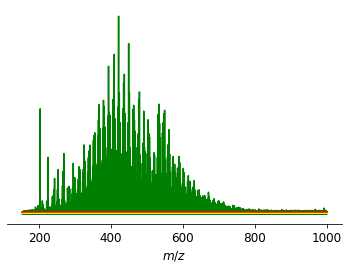

In [28]:
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

MSParameters.mass_spectrum.min_calib_ppm_error = -5
MSParameters.mass_spectrum.max_calib_ppm_error = 5

mass_spectrum = import_transient()

ref_file_location = Path('data') / 'SRFA.ref'

MzDomainCalibration(mass_spectrum, ref_file_location).run()


### 6. Molecular formula search

Loading molecular formula database: 0it [00:00, ?it/s]

'runworker'  8.14 ms


Loading molecular formula database: 34514it [00:04, 8051.11it/s]
Started molecular formula search for class {"O": 20}, (de)protonated : 100%|██████████| 20/20 [00:01<00:00, 11.47it/s]


'run_molecular_formula'  6211.38 ms
3528 peaks assigned and 7132 peaks not assigned, total  = 33.10 %, relative abundance = 64.23 %, RMS error (best candidate) (ppm) = 3.471


<AxesSubplot:xlabel='$\t{m/z}$', ylabel='Abundance'>

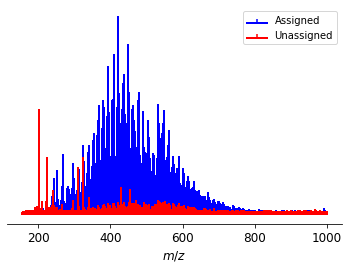

In [47]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.molecular_id.factory.classification import HeteroatomsClassification

# mass_spectrum.molecular_search_settings.url_database = "path_to_db"

mass_spectrum.molecular_search_settings.error_method = 'None'
mass_spectrum.molecular_search_settings.min_ppm_error  = -1
mass_spectrum.molecular_search_settings.max_ppm_error = 1

mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 50

mass_spectrum.molecular_search_settings.isProtonated = True 
mass_spectrum.molecular_search_settings.isRadical= False 
mass_spectrum.molecular_search_settings.isadduct = True 

mass_spectrum.molecular_search_settings.usedAtoms['C'] = (1,90)
mass_spectrum.molecular_search_settings.usedAtoms['H'] = (4,200)
mass_spectrum.molecular_search_settings.usedAtoms['O'] = (1,20)
mass_spectrum.molecular_search_settings.usedAtoms['N'] = (0,0)
mass_spectrum.molecular_search_settings.usedAtoms['S'] = (0,0)

SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)

mass_spectrum_by_classes = HeteroatomsClassification(mass_spectrum, choose_molecular_formula=True)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()


### 7. Accessing the molecular formula  objects

In [41]:
for mspeaks in mass_spectrum.sort_by_abundance():
   if mspeak: #or just if mspeak:
        for mf in mspeaks:
            print(mf.mz_calc, mf.dbe, mf.class_label, mf.string_formated)


In [33]:
print (mass_spectrum.analyzer)

ICR


### 8. Export the results

In [42]:
#exporting data
mass_spectrum_obj.to_csv("data/filename")
mass_spectrum_obj.to_hdf("data/filename")

# save pandas Datarame to pickle
mass_spectrum_obj.to_pandas("data/filename")

# get pandas Dataframe
df = mass_spectrum_obj.to_dataframe()

index_processed_data 1


In [43]:
df.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Resolving Power,S/N,Ion Charge,Mass Error (ppm),Mass Error Score,Isotopologue Similarity,Confidence Score,DBE,H/C,O/C,Heteroatom Class,Ion Type,Is Isotopologue,Mono Isotopic Index,Molecular Formula
0,0,999.660169,999.660169,NaN,552551.352374,128858.974330,2.936449,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN
1,1,999.122414,999.122414,NaN,583095.372495,128928.374324,3.098770,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN
2,2,998.263462,998.263462,NaN,506647.667103,129039.174327,2.692501,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN
3,3,997.818428,997.818428,NaN,553852.769756,129096.774335,2.943365,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN
4,4,997.352826,997.352826,NaN,476154.444796,58708.079237,2.530449,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unassigned,NaN,NaN,NaN,NaN
